In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tkinter as tk
from tkinter import messagebox
import pickle

In [2]:
#Veri setinin okutulması ve ilk 5 satırının ekrana yazdırılması
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
#Veri setinin yapısı
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [4]:
#Eksik değer kontrolü
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Eksik verilerin toplamı
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [6]:
#Kaç adet sıfır değeri olduğunu gösteriyor
df.eq(0).sum()

age           0
sex          87
cp            0
trestbps      0
chol          0
fbs         230
restecg     131
thalach       0
exang       181
oldpeak      85
slope         0
ca          160
thal          0
presence      0
dtype: int64

In [7]:
#Korelasyon analizi
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
cp,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
trestbps,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fbs,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
restecg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
thalach,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exang,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


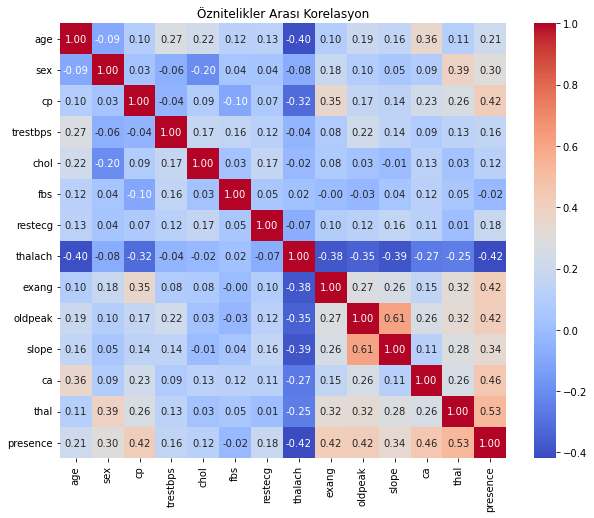

In [8]:
# Korelasyon analizi ısı haritası
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Öznitelikler Arası Korelasyon")
plt.show()

In [9]:
x = (df.presence == 2)
print("Kalp hastası olan kişi sayısı:",x.sum())

Kalp hastası olan kişi sayısı: 120


In [10]:
y = (df.presence == 1)
print("Kalp hastası olmayan kişi sayısı:",y.sum())

Kalp hastası olmayan kişi sayısı: 150


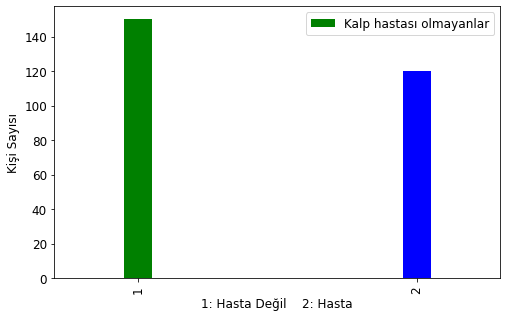

In [11]:
#Kalp hastalığı olan ve olmayan kişi sayısının grafiği
df.presence.value_counts().plot(kind="bar",width=0.1,color=["green","blue"],legend=1,figsize=(8,5))
plt.xticks(fontsize=12)
plt.xlabel("1: Hasta Değil    2: Hasta", fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.legend(["Kalp hastası olmayanlar"],fontsize=12);
plt.show()

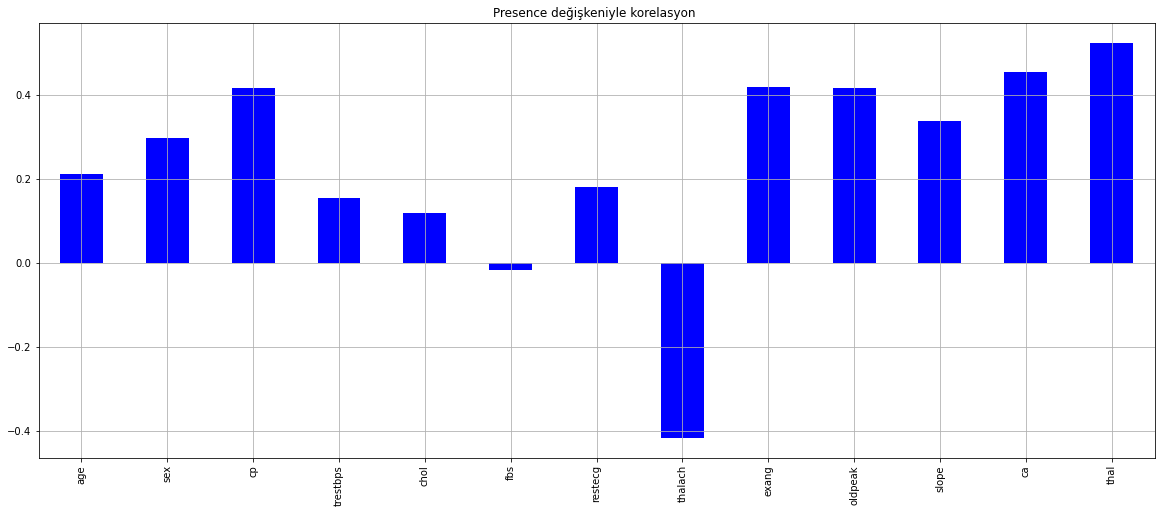

In [12]:
#Özniteliklerin presence değişkeni ile olan ilişkisini inceliyoruz, bar ne kadar büyük ise ilişki o kadar büyüktür.
df.drop('presence', axis=1).corrwith(df.presence).plot(kind='bar', grid=True, figsize=(20, 8), title="Presence değişkeniyle korelasyon ",color="blue");

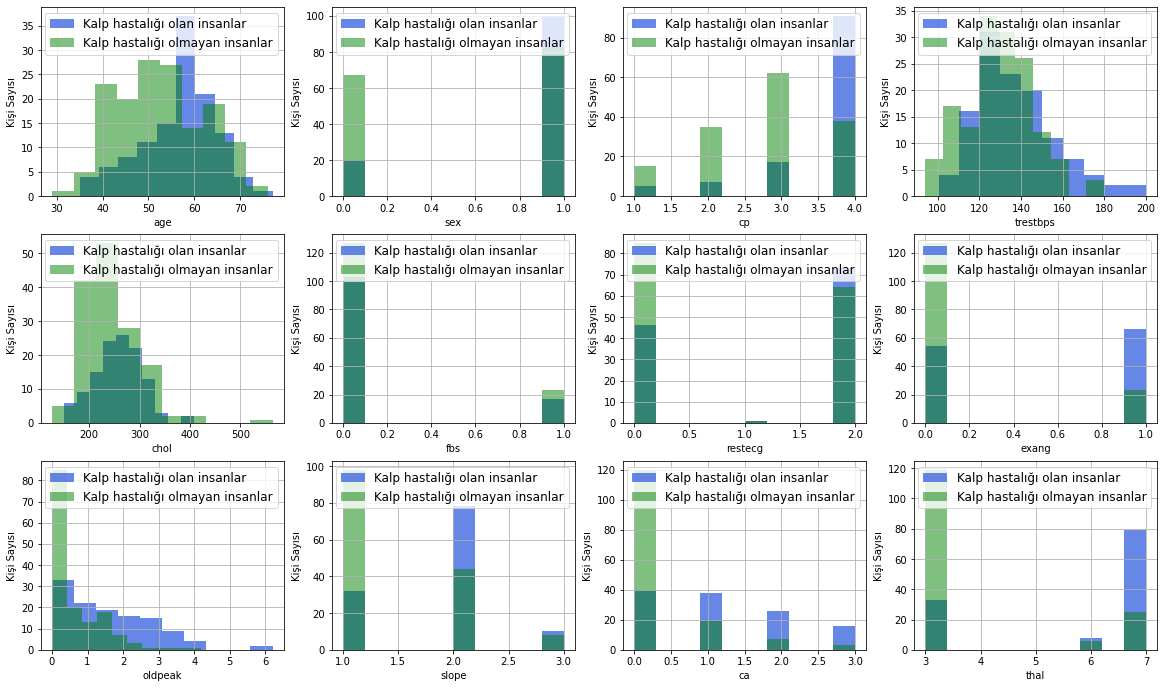

In [13]:
# Kategorik özelliklerin histogramı
categorical_val = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak", "slope", "ca", "thal"]

plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(4, 4, i)
    df[df["presence"] == 2][column].hist(bins=10, color='royalblue', label='Kalp hastalığı olan insanlar',alpha=0.8)
    df[df["presence"] == 1][column].hist(bins=10, color='green', label='Kalp hastalığı olmayan insanlar',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("Kişi Sayısı")

In [14]:
x = df.drop(["presence"], axis = 1)
y = df["presence"]

# X verileri, y hedef değişkeni
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# SVM modelini oluşturma
svm_model = SVC()

# Optimizasyon için denenecek parametre aralıkları
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# En iyi parametreleri kaydetme
best_params = grid_search.best_params_

# En iyi parametreler ile modeli tekrar eğitiyoruz
optimized_svm_model = SVC(**best_params)
optimized_svm_model.fit(x_train, y_train)

# Modeli test verileriyle değerlendiriyoruz
y_pred = optimized_svm_model.predict(x_test)

# Doğruluk değerini hesaplama
accuracy_svm = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_svm)

# Hassasiyet değerini hesaplama
precision_svm = precision_score(y_test, y_pred)
print("Hassasiyet :", precision_svm)

# Duyarlılık  değerini hesaplama
recall_svm = recall_score(y_test, y_pred)
print("Duyarlılık :", recall_svm)

# F1 skorunu hesaplama
f1_svm = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_svm)

# AUC değerini hesaplama
auc_svm = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_svm)


# Diğer modellerle karşılaştırma yapmak için sonuçları ayrı değişkenlere kaydediyorum
svm_results = {
    "Doğruluk": accuracy_svm,
    "Hassasiyet": precision_svm,
    "Duyarlılık": recall_svm,
    "F1 Skoru": f1_svm,
    "AUC Değeri": auc_svm,
}


Doğruluk: 0.8703703703703703
Hassasiyet : 0.8823529411764706
Duyarlılık : 0.9090909090909091
F1 Skoru: 0.8955223880597014
AUC Değeri: 0.8593073593073594


In [16]:
# Naive Bayes modelinin oluşturulması

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

optimized_nb_model = GaussianNB(**best_params).fit(x_train, y_train)

y_pred = optimized_nb_model.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_nb)

precision_nb = precision_score(y_test, y_pred)
print("Hassasiyet :", precision_nb)

recall_nb = recall_score(y_test, y_pred)
print("Duyarlılık :", recall_nb)

f1_nb = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_nb)

auc_nb = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_nb)

nb_results = {
    "Doğruluk": accuracy_nb,
    "Hassasiyet": precision_nb,
    "Duyarlılık": recall_nb,
    "F1 Skoru": f1_nb,
    "AUC Değeri": auc_nb,
}


Doğruluk: 0.9074074074074074
Hassasiyet : 0.8888888888888888
Duyarlılık : 0.9696969696969697
F1 Skoru: 0.927536231884058
AUC Değeri: 0.8896103896103897


In [17]:
# K En Yakın Komşu modelini oluşturulması

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

optimized_knn_model = KNeighborsClassifier(**best_params)
optimized_knn_model.fit(x_train, y_train)

y_pred = optimized_knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_knn)

precision_knn = precision_score(y_test, y_pred)
print("Hassasiyet:", precision_knn)

recall_knn = recall_score(y_test, y_pred)
print("Duyarlılık :", recall_knn)

f1_knn = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_knn)

auc_knn = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_knn)

knn_results = {
    "Doğruluk": accuracy_knn,
    "Hassasiyet": precision_knn,
    "Duyarlılık": recall_knn,
    "F1 Skoru": f1_knn,
    "AUC Değeri": auc_knn,
}

Doğruluk: 0.6481481481481481
Hassasiyet: 0.7333333333333333
Duyarlılık : 0.6666666666666666
F1 Skoru: 0.6984126984126984
AUC Değeri: 0.6428571428571429


In [18]:
# Karar Ağacı modelini oluşturulması

dt_model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

optimized_dt_model = DecisionTreeClassifier(**best_params).fit(x_train, y_train)

y_pred = optimized_dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_dt)

precision_dt = precision_score(y_test, y_pred)
print("Hassasiyet:", precision_dt)

recall_dt = recall_score(y_test, y_pred)
print("Duyarlılık:", recall_dt)

f1_dt = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_dt)

auc_dt = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_dt)

dt_results = {
    "Doğruluk": accuracy_dt,
    "Hassasiyet": precision_dt,
    "Duyarlılık": recall_dt,
    "F1 Skoru": f1_dt,
    "AUC Değeri": auc_dt,
}

Doğruluk: 0.8333333333333334
Hassasiyet: 0.8157894736842105
Duyarlılık: 0.9393939393939394
F1 Skoru: 0.8732394366197183
AUC Değeri: 0.803030303030303


In [19]:
# Rastgele Orman modelini oluşturulması

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

optimized_rf_model = RandomForestClassifier(**best_params).fit(x_train, y_train)

y_pred = optimized_rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_rf)

precision_rf = precision_score(y_test, y_pred)
print("Hassasiyet:", precision_rf)

recall_rf = recall_score(y_test, y_pred)
print("Duyarlılık:", recall_rf)

f1_rf = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_rf)

auc_rf = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_rf)

rf_results = {
    "Doğruluk": accuracy_rf,
    "Hassasiyet": precision_rf,
    "Duyarlılık": recall_rf,
    "F1 Skoru": f1_rf,
    "AUC Değeri": auc_rf,
}




Doğruluk: 0.9074074074074074
Hassasiyet: 0.8888888888888888
Duyarlılık: 0.9696969696969697
F1 Skoru: 0.927536231884058
AUC Değeri: 0.8896103896103897


In [20]:
# Lineer Diskriminant Analizi modelini oluşturulması

lda_model = LinearDiscriminantAnalysis()

lda_model.fit(x_train, y_train)

y_pred = lda_model.predict(x_test)

accuracy_lda = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy_lda)

precision_lda = precision_score(y_test, y_pred)
print("Hassasiyet:", precision_lda)

recall_lda = recall_score(y_test, y_pred)
print("Duyarlılık:", recall_lda)

f1_lda = f1_score(y_test, y_pred)
print("F1 Skoru:", f1_lda)

auc_lda = roc_auc_score(y_test, y_pred)
print("AUC Değeri:", auc_lda)

lda_results = {
    "Doğruluk": accuracy_lda,
    "Hassasiyet": precision_lda,
    "Duyarlılık": recall_lda,
    "F1 Skoru": f1_lda,
    "AUC Değeri": auc_lda,
}

Doğruluk: 0.9259259259259259
Hassasiyet: 0.9142857142857143
Duyarlılık: 0.9696969696969697
F1 Skoru: 0.9411764705882354
AUC Değeri: 0.9134199134199135


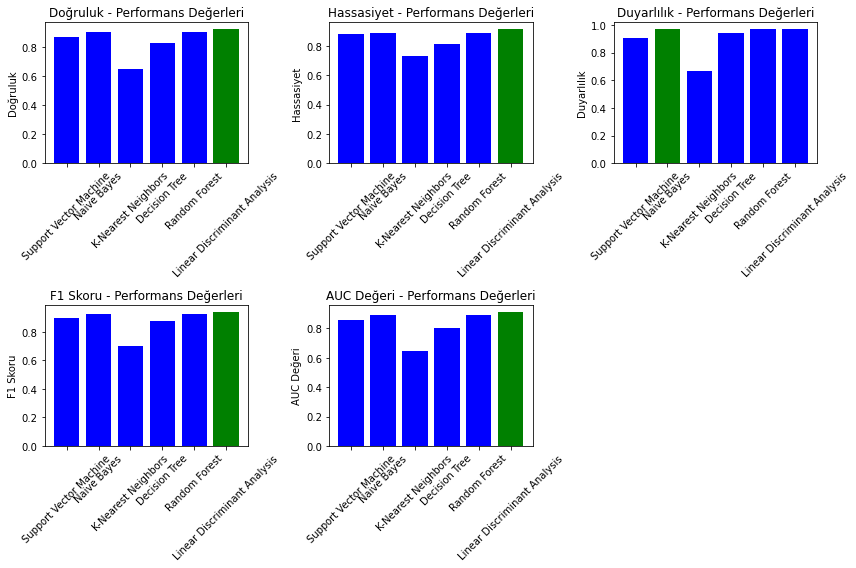

In [21]:


# Model performans karşılaştırması
skorlar = [svm_results, nb_results, knn_results, dt_results, rf_results, lda_results]
algoritmalar = ["Support Vector Machine", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Linear Discriminant Analysis"]

# Performans metriklerinin isimleri
metrikler = ["Doğruluk", "Hassasiyet", "Duyarlılık", "F1 Skoru", "AUC Değeri"]

# Grafik oluşturma
plt.figure(figsize=(12, 8))

# Her bir metrik için ayrı grafik oluşturma
for i, metrik in enumerate(metrikler):
    plt.subplot(2, 3, i+1)  # 2 satır, 3 sütunlu bir alt grafiğe geçiş
    skorlar_metrik = [skorlar[j].get(metrik, 0) for j in range(len(skorlar))]
    max_skor = max(skorlar_metrik)
    max_skor_index = skorlar_metrik.index(max_skor)
    colors = ['green' if j == max_skor_index else 'blue' for j in range(len(skorlar_metrik))]
    plt.bar(algoritmalar, skorlar_metrik, color=colors)
    plt.ylabel(metrik)
    plt.title(metrik + " - Performans Değerleri")
    plt.xticks(rotation=45)

# Grafiklerin düzenini ayarlama
plt.tight_layout()

# Grafikleri gösterme
plt.show()


In [22]:
#Model performans karşılaştırması
skorlar = [svm_results, nb_results, knn_results, dt_results, rf_results, lda_results]
algoritmalar = ["Support Vector Machine", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Linear Discriminant Analysis"]

for i in range(len(algoritmalar)):
    print("Model: " + algoritmalar[i] + ":")
    for key, value in skorlar[i].items():
        print(key + ": " + str(value))
    print()

Model: Support Vector Machine:
Doğruluk: 0.8703703703703703
Hassasiyet: 0.8823529411764706
Duyarlılık: 0.9090909090909091
F1 Skoru: 0.8955223880597014
AUC Değeri: 0.8593073593073594

Model: Naive Bayes:
Doğruluk: 0.9074074074074074
Hassasiyet: 0.8888888888888888
Duyarlılık: 0.9696969696969697
F1 Skoru: 0.927536231884058
AUC Değeri: 0.8896103896103897

Model: K-Nearest Neighbors:
Doğruluk: 0.6481481481481481
Hassasiyet: 0.7333333333333333
Duyarlılık: 0.6666666666666666
F1 Skoru: 0.6984126984126984
AUC Değeri: 0.6428571428571429

Model: Decision Tree:
Doğruluk: 0.8333333333333334
Hassasiyet: 0.8157894736842105
Duyarlılık: 0.9393939393939394
F1 Skoru: 0.8732394366197183
AUC Değeri: 0.803030303030303

Model: Random Forest:
Doğruluk: 0.9074074074074074
Hassasiyet: 0.8888888888888888
Duyarlılık: 0.9696969696969697
F1 Skoru: 0.927536231884058
AUC Değeri: 0.8896103896103897

Model: Linear Discriminant Analysis:
Doğruluk: 0.9259259259259259
Hassasiyet: 0.9142857142857143
Duyarlılık: 0.969696969

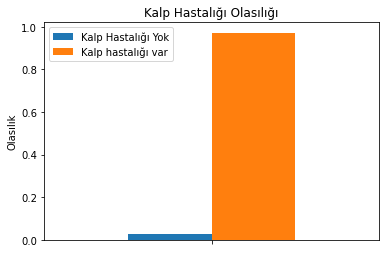

In [24]:
# Arayüz penceresinin oluşturulması
window = tk.Tk()
window.title("Kalp Hastalığı Tahmini")
window.geometry("500x900")
window.configure(background="#ffffff")
window.iconbitmap('kalp2.ico')

title_label = tk.Label(window, text="Kalp Hastalığı Tahmini", font=("Arial", 20, "bold"), background="#a52a2a", fg="#ffffff", pady=20)
title_label.pack(fill=tk.X)

# Öznitelikler
labels = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
tooltips = ["Hastanın yaşı", "Hastanın cinsiyeti (1 = erkek, 0 = kadın)", "Göğüs ağrısı tipi (1 = tip 1 anjin, 2 = tip 2 anjin, 3 = tip 3 anjin, 4 = asimptomatik)", " Dinlenme kan basıncı (mm Hg)", "Kolesterol ölçümü (mg/dl)", "Açlık kan şekeri > 120 mg/dl ise 1, değilse 0", "Dinlenme elektrokardiyografik sonuçları (0 = normal, 1 = ST-T dalgası anomali, 2 = olası veya kesin sol ventrikül hipertrofisi)", "Maksimum kalp atış hızı", "Egzersiz indüklenmiş anjin varsa 1, yoksa 0", "Dinlenme durumundaki ST depresyonu, egzersizle indüklendiğinde negatif değer alır", "ST segmentinin eğimi (1 = yukarı doğru eğimli, 2 = düz, 3 = aşağı doğru eğimli)", " Renkli flürospi ile görülen büyük damar sayısı (0-3 arası değer alır)", "Thalassemi türü (3 = normal, 6 = sabit hata, 7 = tersinir hata)"]

# Tooltip sınıfı
class ToolTip(object):
    def __init__(self, widget, text='Widget info'):
        self.waittime = 100
        self.wraplength = 180
        self.widget = widget
        self.text = text
        self.widget.bind("<Enter>", self.onEnter)
        self.widget.bind("<Leave>", self.onLeave)
        self.tooltipwindow = None
    def onEnter(self, event=None):
        self.schedule = self.widget.after(self.waittime, self.showTooltip)
    def onLeave(self, event=None):
        self.widget.after_cancel(self.schedule)
        self.hideTooltip()
    def showTooltip(self):
        x, y, _, _ = self.widget.bbox("insert")
        x += self.widget.winfo_rootx() + 25
        y += self.widget.winfo_rooty() + 20
        self.tooltipwindow = tw = tk.Toplevel(self.widget)
        tw.wm_overrideredirect(True)
        tw.wm_geometry(f"+{x}+{y}")
        label = tk.Label(tw, text=self.text, wraplength=self.wraplength, background="#ffffff")
        label.pack()
    def hideTooltip(self):
        tw = self.tooltipwindow
        self.tooltipwindow = None
        if tw:
            tw.destroy()

# Girdi alanları
entries = []
for label, tooltip in zip(labels, tooltips):
    label_frame = tk.Frame(window, background="#f0f8ff")
    label_frame.pack(pady=10)
    tk.Label(label_frame, text=label, font=("Arial", 13), background="#ffffff").pack(side=tk.LEFT)
    entry = tk.Entry(label_frame, font=("Arial", 14), width=10, justify='center')
    entry.pack(side=tk.LEFT)
    entries.append(entry)
    info_label = tk.Label(label_frame, text="?", font=("Arial", 13), foreground="#0000ff")
    info_label.pack(side=tk.RIGHT)
    ToolTip(info_label, text=tooltip)

import os

# Tahmin sonucu etiketi
result_label = tk.Label(window, text="", font=("Arial", 16, "bold"), background="#ffffff")
result_label.pack(pady=30)

# Tahmin sonucunu çıktı olarak gösteren fonksiyon
def show_prediction_result(result):
    if result[0] == 1:
        result_label.config(text="Kalp Hastalığı yok", fg="#007bff")
        messagebox.showinfo("Tahmin Sonucu", "Kalp Hastalığı yok")
    else:
        result_label.config(text="Kalp Hastalığı var", fg="#ff3b30")
        messagebox.showinfo("Tahmin Sonucu", "Kalp Hastalığı var")

# Tahmin işlemini gerçekleştiren fonksiyon
def predict_heart_disease():
    # Kullanıcıdan girilen değerleri alıp numpy dizisine dönüştürülüyor
    input_data = [entry.get() for entry in entries]
    
    # Boş değer kontrolü
    if "" in input_data:
        messagebox.showerror("Hata", "Lütfen tüm alanları doldurun.")
        return
    
    input_data = [float(value) for value in input_data]
    input_array = pd.DataFrame([input_data], columns=labels)
    
    # Tahmin yapma
    result = lda_model.predict(input_array)

    # Sonucu ekrana bastırma
    show_prediction_result(result)

    # Dosyaya kaydetme
    if result[0] == 1:
        filename = "kalp_hastaligi_yok.txt"
    else:
        filename = "kalp_hastaligi_var.txt"

    with open(filename, "w") as file:
        file.write(f"Tahmin Sonucu: {result[0]}\n")
        file.write(f"Yaş: {input_data[0]}\n")
        file.write(f"Cinsiyet: {input_data[1]}\n")
        file.write(f"Göğüs Ağrısı Tipi: {input_data[2]}\n")
        file.write(f"Dinlenme Kan Basıncı: {input_data[3]}\n")
        file.write(f"Kolestorel Ölçümü: {input_data[4]}\n")
        file.write(f"Açlık Kan Şekeri: {input_data[5]}\n")
        file.write(f"Dinlenme elektrokardiyografik sonuçları: {input_data[6]}\n")
        file.write(f"Maksimum kalp atış hızı: {input_data[7]}\n")
        file.write(f"Exang: {input_data[8]}\n")
        file.write(f"Dinlenme durumundaki ST depresyonu: {input_data[9]}\n")
        file.write(f"ST segmentinin eğimi: {input_data[10]}\n")
        file.write(f"Renkli flürospi ile görülen büyük damar sayısı: {input_data[11]}\n")
        file.write(f"Thalassemi türü: {input_data[12]}\n")


    # Grafik oluşturma
    probabilities = lda_model.predict_proba(input_array)
    prob_df = pd.DataFrame(probabilities, columns=["Kalp Hastalığı Yok", "Kalp hastalığı var"])
    fig, ax = plt.subplots()
    prob_df.plot(kind="bar", ax=ax)
    ax.set_xticklabels([""])
    ax.set_ylabel("Olasılık")
    ax.set_title("Kalp Hastalığı Olasılığı")
    plt.show()

    # Grafik dosyasını kaydetme
    if result[0] == 1:
        graph_filename = "kalp_hastaligi_yok.png"
    else:
        graph_filename = "kalp_hastaligi_var.png"

    plt.savefig(graph_filename)

    # Grafik penceresini kapatma
    plt.close()

    # Dosya ve grafik adlarını ekrana bastırma
    messagebox.showinfo("Bilgi", f"Tahmin sonucu dosya olarak kaydedildi: {filename}")
    messagebox.showinfo("Bilgi", f"Grafik dosya olarak kaydedildi: {graph_filename}")

# Tahmin yap butonu
predict_button = tk.Button(window, text="Tahmin Yap", command=predict_heart_disease, font=("Arial", 16), bg="#a52a2a", fg="#ffffff", relief=tk.RAISED, pady=10)
predict_button.pack(fill=tk.X, padx=50, pady=20)

window.mainloop()